DBSCAN (Density-Based Spatial Clustering of Applications with Noise) - это популярный алгоритм кластеризации, используемый в машинном обучении 
и анализе данных. Он работает по принципу определения плотных областей в пространстве данных и разделения данных на кластеры на основе плотности.

<p class="has-line-data" data-line-start="3" data-line-end="4">Алгоритм работы</p>
<ol>
<li class="has-line-data" data-line-start="4" data-line-end="5">Маркировка всех точек как не посещенных.</li>
<li class="has-line-data" data-line-start="5" data-line-end="13">Итерация по каждой точке в наборе данных:<br>
2.1. Если точка не посещена:<br>
2.1.1. Пометить точку как посещенную.<br>
2.1.2. Найти все точки в ε-окрестности этой точки.<br>
2.1.3. Если найдено достаточно точек (больше или равно MinPts), создать новый кластер.<br>
2.1.3.1. Добавить эту точку и все точки в ε-окрестности в кластер.<br>
2.1.3.2. Повторить процесс для каждой точки в ε-окрестности, если она не посещена.<br>
2.1.4. Если точек недостаточно, пометить эту точку как шум.</li>
<li class="has-line-data" data-line-start="13" data-line-end="15">Конец алгоритма: Все точки либо включены в кластеры, либо помечены как шум.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [2]:
centers = [[0, 1], [-1, -1], [1, -1]]
X, y_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4, random_state=25000)

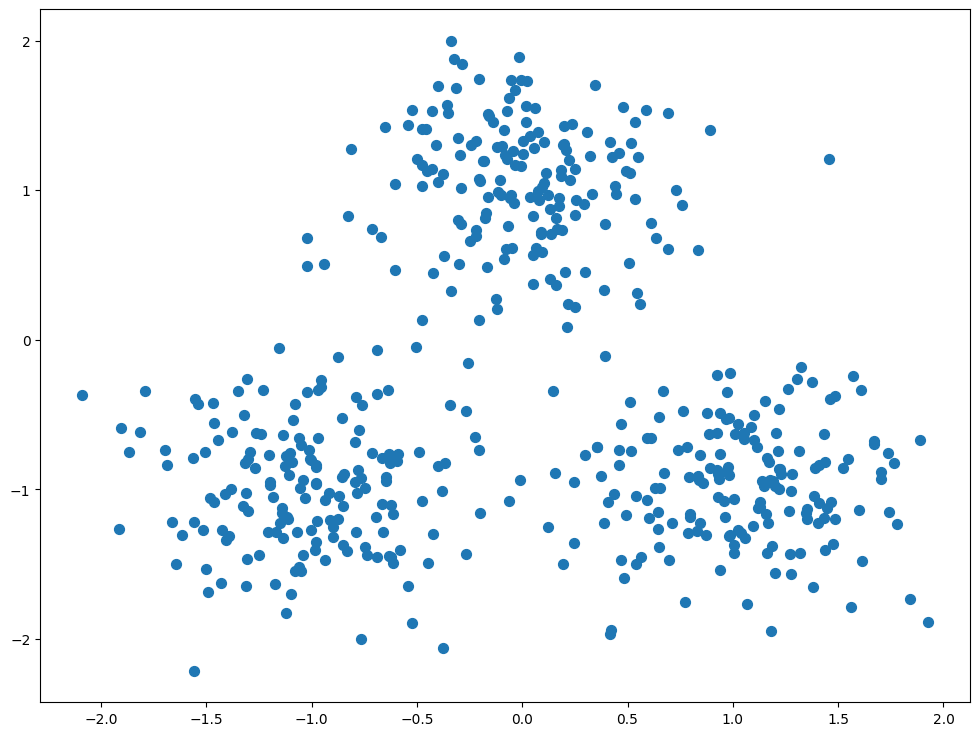

In [3]:
plt.figure(figsize=(12,9))

plt.scatter(X[:, 0], X[:, 1], s=50)

plt.show()

Predicted clusters information: 5


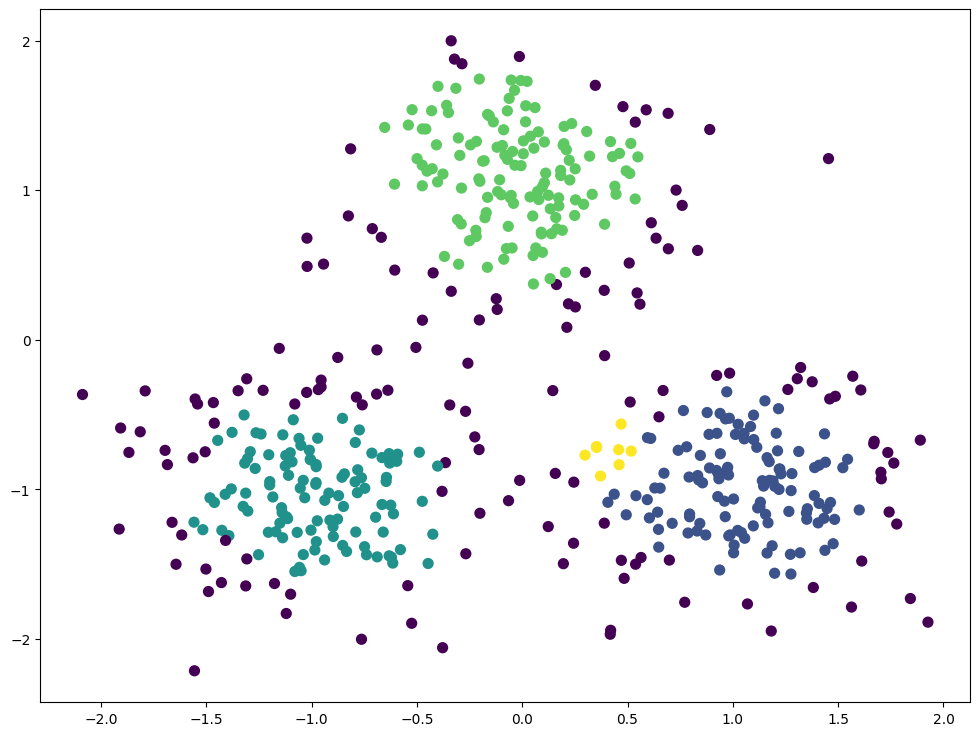

In [4]:
predicted = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)
predicted

print(f"Predicted clusters information: {len(np.unique(predicted))}")

plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=predicted, s=50)
plt.show()

[0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994]
[0.23986292571839885, 0.5217041869826932, 0.5706635922156383, 0.5988297145843321, 0.2699147638340627, 0.30335274749183905, 0.30335274749183905]


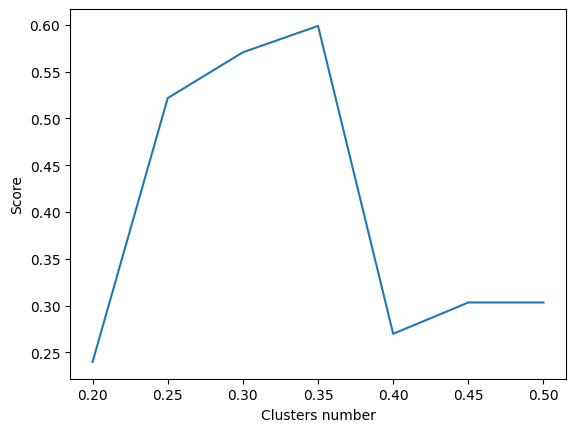

In [5]:
points = []
scores = []
eps = 0.2
while eps <= 0.5:
    prediction = DBSCAN(eps=eps, min_samples=10).fit_predict(X)

    # plt.figure(figsize=(12,9))
    # plt.scatter(X[:, 0], X[:, 1], c=predicted, s=50)
    # plt.show()
    
    score = silhouette_score(X, prediction)
    points.append(eps)
    scores.append(score)
    eps += 0.05

print(points)
print(scores)

plt.plot(points, scores)
plt.xlabel('Clusters number')
plt.ylabel('Score')
plt.show()

Predicted clusters information: 4


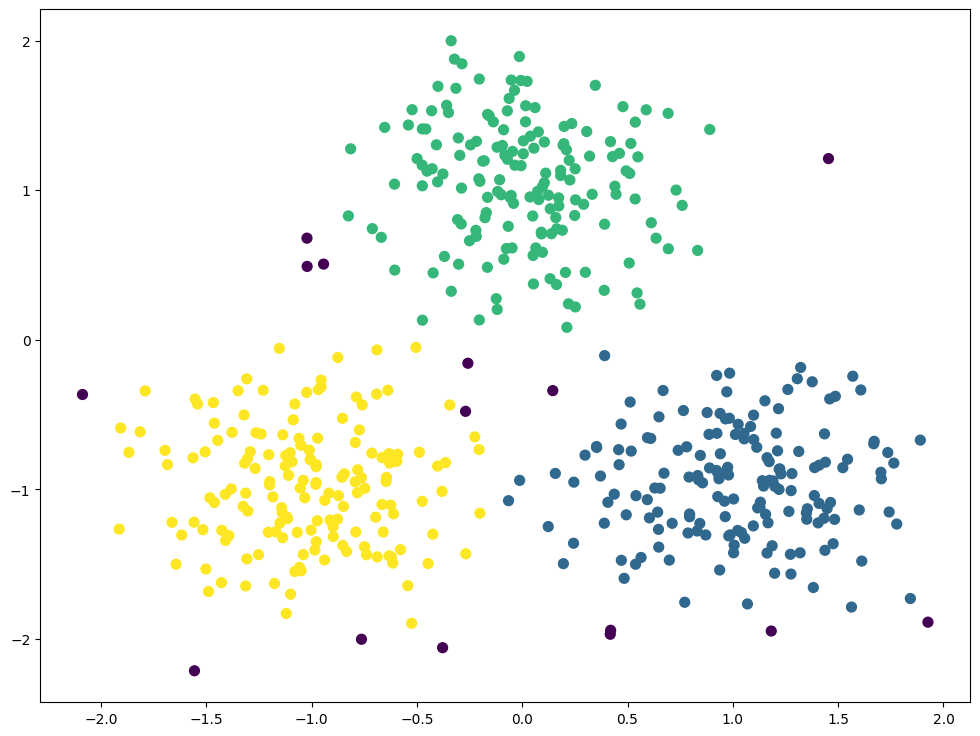

In [6]:
predicted = DBSCAN(eps=0.35, min_samples=10).fit_predict(X)
predicted

print(f"Predicted clusters information: {len(np.unique(predicted))}")

plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=predicted, s=50)
plt.show()